<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-12-15 20:29:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  62.9MB/s    in 3.3s    

2025-12-15 20:29:11 (60.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


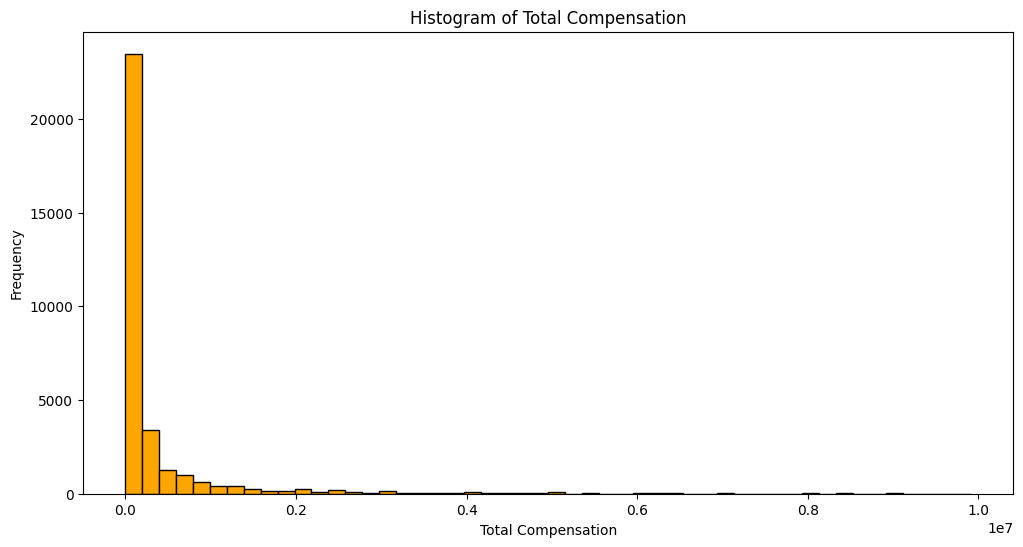

In [9]:
import numpy as np
QUERY1 = "SELECT CompTotal FROM main"

df_comp = pd.read_sql_query(QUERY1, conn)
df_comp = df_comp.dropna(subset=['CompTotal'])

#remove outliers
df_comp = df_comp[df_comp['CompTotal'] < 1e7]


plt.figure(figsize=(12,6))
plt.hist(df_comp, bins=50, color='orange', edgecolor='black')
plt.title('Histogram of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


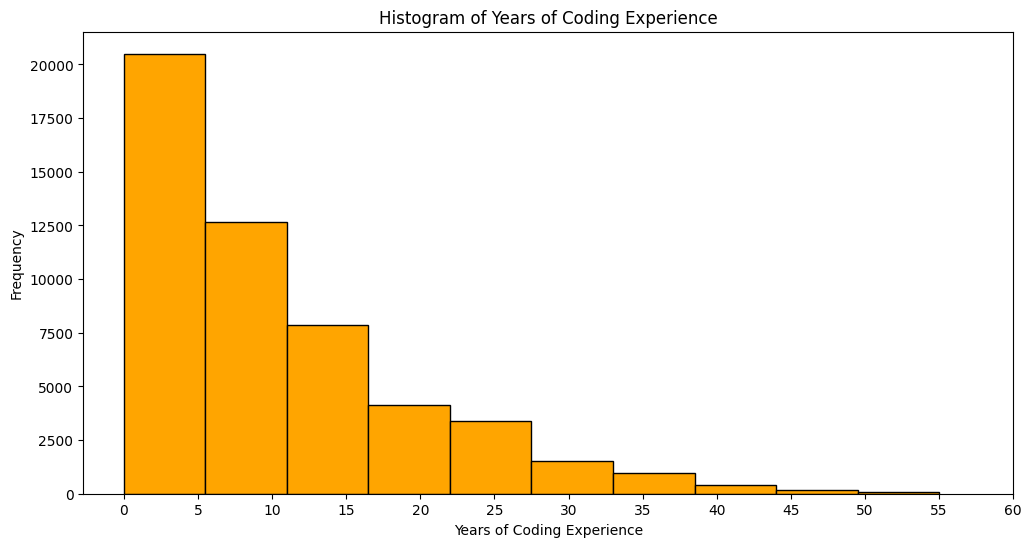

In [10]:
QUERY2 = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"

df_years = pd.read_sql_query(QUERY2, conn)

df_years['YearsCodePro'] = df_years['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 55}).astype(int)

plt.figure(figsize=(12,6))
plt.hist(df_years, bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Years of Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.xticks(np.arange(0, 65, 5))
plt.ylabel('Frequency')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


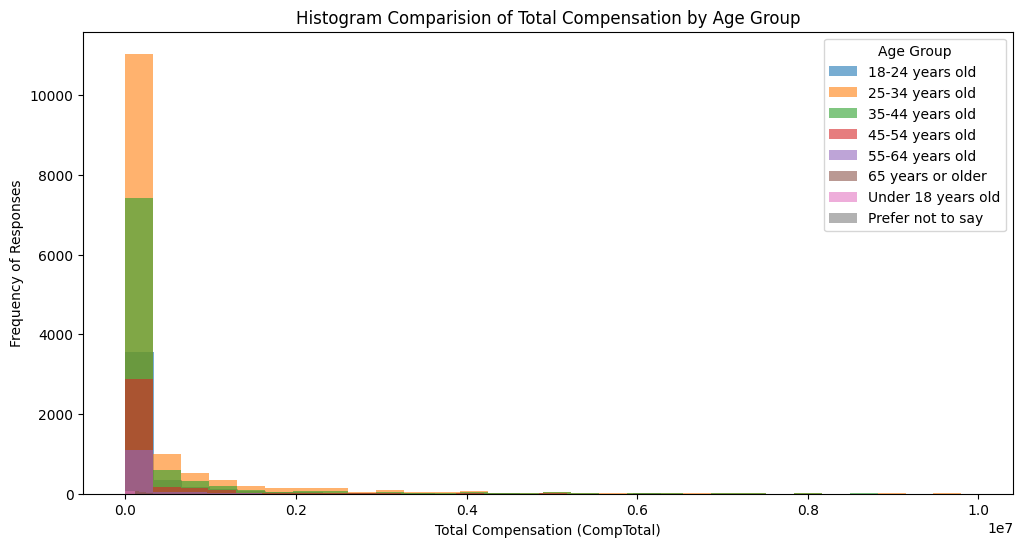

In [11]:
QUERY3 = "SELECT CompTotal, Age FROM main WHERE CompTotal IS NOT NULL AND Age IS NOT NULL"

df_dist = pd.read_sql_query(QUERY3,conn)
df_dist = df_dist[df_dist['CompTotal'] < 1e7]
df_dist = df_dist[df_dist['CompTotal'] > 0]

plt.figure(figsize=(12,6))

for age in df_dist['Age'].unique():
    comp_data=df_dist[df_dist['Age']==age]['CompTotal']
    plt.hist(comp_data, bins=30, alpha=0.6, label=age)

plt.title('Histogram Comparision of Total Compensation by Age Group')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Frequency of Responses')
plt.legend(title='Age Group')

plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


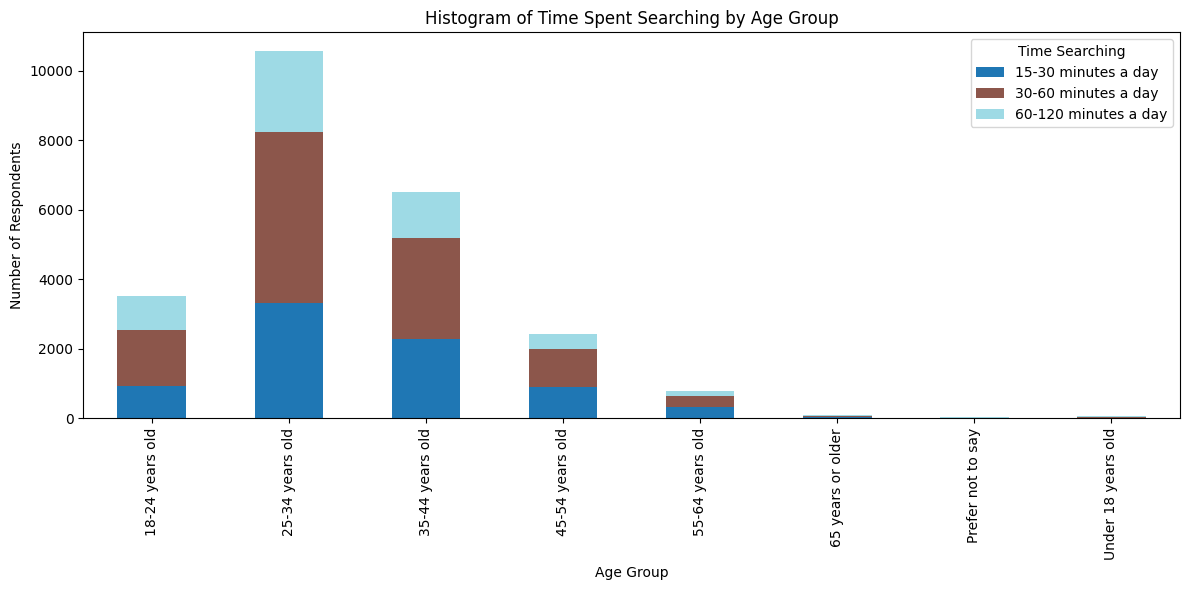

In [12]:
QUERY4 = "SELECT TimeSearching, Age FROM main WHERE TimeSearching AND Age IS NOT NULL"

df_time = pd.read_sql_query(QUERY4, conn)

freq_table = pd.crosstab(df_time['Age'], df_time['TimeSearching'])
freq_table = freq_table.sort_values(by='Age')


freq_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Histogram of Time Spent Searching by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Time Searching')
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


  DatabaseWantToWorkWith  count
0             PostgreSQL  24005
1                 SQLite  13489
2                  MySQL  12269
3                MongoDB  10982
4                  Redis  10847


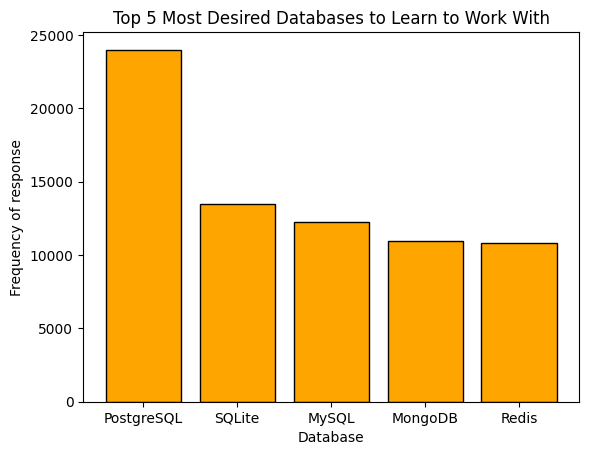

In [13]:
QUERY5 = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df_wanted = pd.read_sql(QUERY5, conn)
df_wanted['DatabaseWantToWorkWith'] = df_wanted['DatabaseWantToWorkWith'].str.split(';')
df_wanted = df_wanted.explode('DatabaseWantToWorkWith')
df_wanted = df_wanted.value_counts().head().reset_index()
print(df_wanted)

plt.bar(x=df_wanted['DatabaseWantToWorkWith'], height=df_wanted['count'], color='orange', edgecolor='black')

plt.title('Top 5 Most Desired Databases to Learn to Work With')
plt.xlabel('Database')
plt.ylabel('Frequency of response')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


(array([0, 1, 2]),
 [Text(0, 0, '(Hybrid (some remote, some in-person),)'),
  Text(1, 0, '(Remote,)'),
  Text(2, 0, '(In-person,)')])

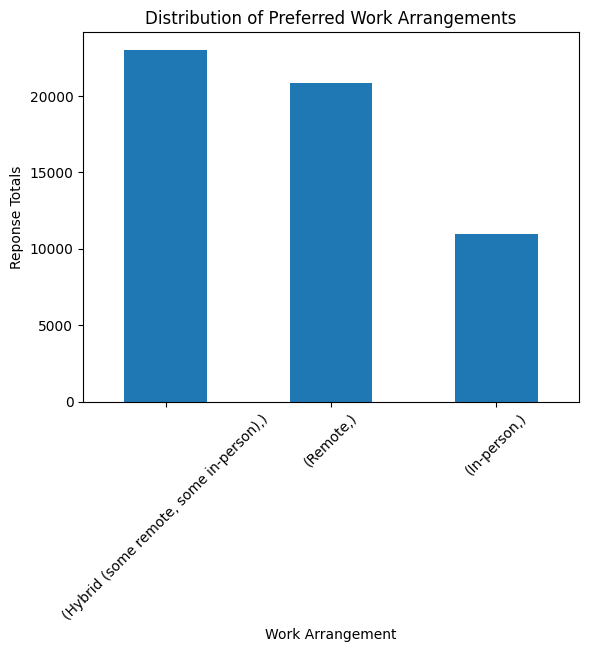

In [14]:
QUERY6 = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df_remote = pd.read_sql_query(QUERY6, conn)

df_remote = df_remote.value_counts()
df_remote.plot(kind='bar')
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Reponse Totals')
plt.xticks(rotation=45)

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


CompTotal    0
Age          0
dtype: int64


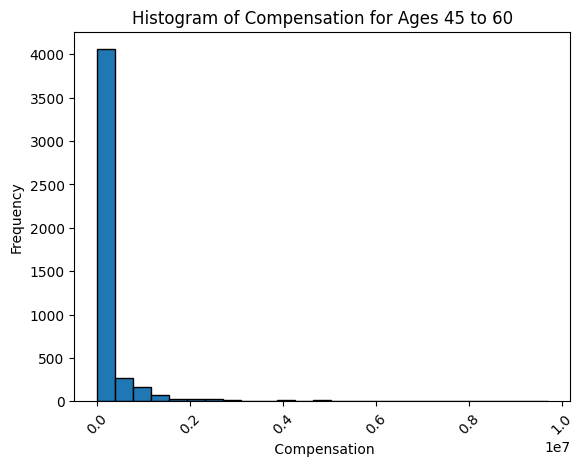

In [15]:
QUERY7 = "SELECT CompTotal, Age FROM main WHERE Age == '45-54 years old' OR Age == '55-64 years old'"
df_comp=pd.read_sql_query(QUERY7, conn)
df_comp= df_comp[df_comp["CompTotal"] < 1e7]

df_comp.fillna(df_comp['CompTotal'].mean(), inplace=True)
print(df_comp.isna().sum())


plt.hist(df_comp['CompTotal'], bins=25, edgecolor='black')
plt.xlabel(" Compensation")
plt.ylabel("Frequency")
plt.title("Histogram of Compensation for Ages 45 to 60")
plt.xticks(rotation=45)

plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [16]:
QUERY7 = "SELECT JobSat, YearsCodePro FROM main"

df_sat = pd.read_sql_query(QUERY7, conn)

df_sat['JobSat'] = df_sat['JobSat'].fillna(df_sat['JobSat'].median())
df_sat['YearsCodePro'] = df_sat['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)

df_sat['YearsCodePro']=df_sat['YearsCodePro'].fillna(df_sat['YearsCodePro'].median())

QUERY7 = "SELECT JobSat, YearsCodePro FROM main"

df_sat = pd.read_sql_query(QUERY7, conn)

df_sat['JobSat'] = df_sat['JobSat'].fillna(df_sat['JobSat'].median())
df_sat['YearsCodePro'] = df_sat['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)

df_sat['YearsCodePro']=df_sat['YearsCodePro'].fillna(df_sat['YearsCodePro'].median())

plt.figure(figsize=(12,6))
plt.hist(x=df_sat['YearsCodePro'],bins=10, histtype='bar',edgecol)
plt.title('Job Satisfaction by Years of Professional Coding')
plt.xlabel('Years of Coding Professioanlly')
plt.ylabel('Job Satisfaction')
plt.show()

SyntaxError: positional argument follows keyword argument (2653347078.py, line 14)

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
